## Matplotlib and Seaborn

### Introduction

Till here we have learned to use NumPy and Pandas for performing statistical and mathematical operations.
    Now to we will learn about Matplotlib and Seaborn packages which will help us visualize that data to get more insights from it.


### Tidy Data

To achieve correct results from your data you are required to clean the data but besides that we need to cast that data into something
which is called _Tidy Data_

**Tidy Data** is a tabular dataset which follows these rules:
- each variable is a column
- each observation/record is a row
- each type of observational unit is a table

For example, you have below dataset of a hospital - which consists of patient records and their respective treatments

![](tidy-data-one.png)


### Bar Chart

#### Using Seaborn

  We can use countplot() func from seaborn library to creat a basic chart of given data

    seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)

  To create vertical bar chart with default colors and with just a single color

In [169]:
import matplotlib.pyplot
!pip install numpy pandas matplotlib seaborn
!echo "installation completed------------------"

You should consider upgrading via the '/Users/Shashwat.Kare/PycharmProjects/firstTest/venv1/bin/python -m pip install --upgrade pip' command.
installation completed------------------


(807, 14)


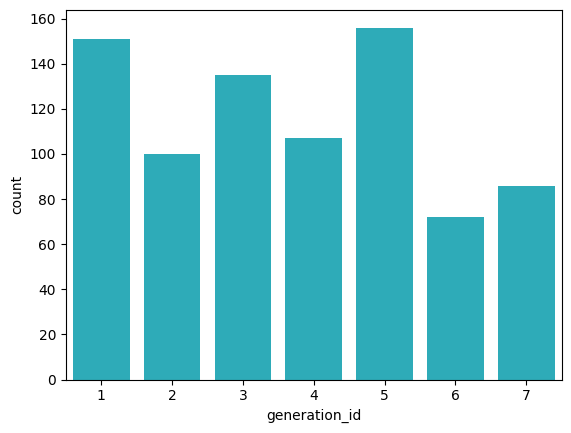

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)
# print(pokemon.head(10))

# sb.countplot(data=pokemon, x='generation_id');
base_color = sb.color_palette()[9]
sb.countplot(data=pokemon, x='generation_id', color=base_color);


#### Using Matplotlib

   We can create bar chart with Matplotlib using

        matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
   We will be using series.value_counts() for extracting a part of our pokemon dataframe

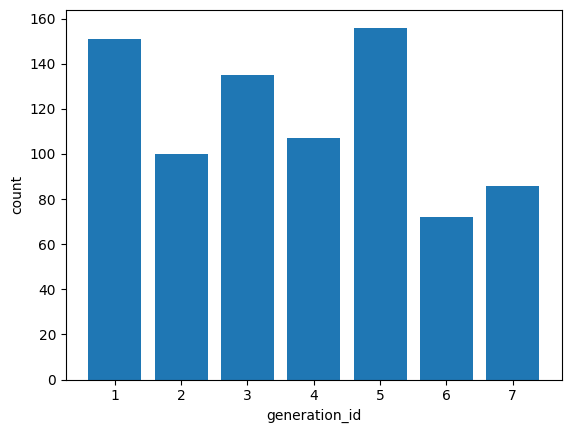

In [174]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

plt.xlabel('generation_id')
plt.ylabel('count')

plt.show()


We can also use order argument in Seaborn for sorting the bars as per our needs
    For example


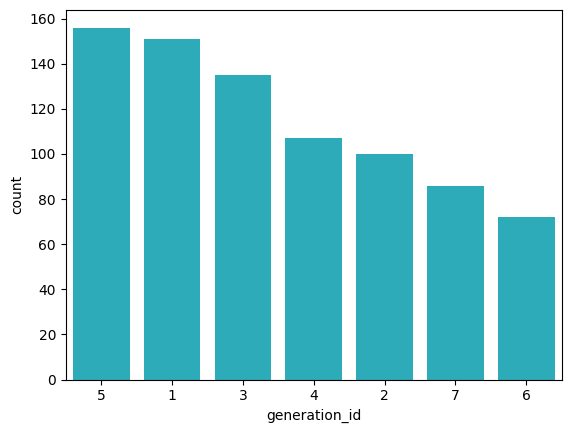

In [176]:
# Static-ordering the bars
# sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order

freq = pokemon['generation_id'].value_counts()
gen_order = freq.index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);


Till now, we looked at the frequency of generation_id of pokemon to be charted on the bar.
but this chart does not provide us with more detailed insight. For that we need rotate the category labels


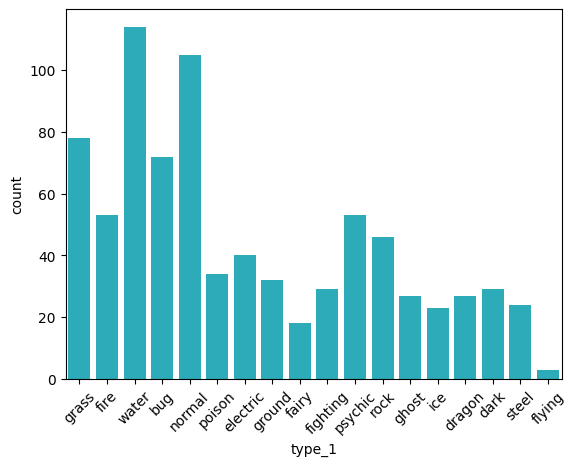

In [178]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);
# sb.countplot(data=pokemon, x='type_2', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=45);


We can also rotate the axes of following chart to make it more readable


,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


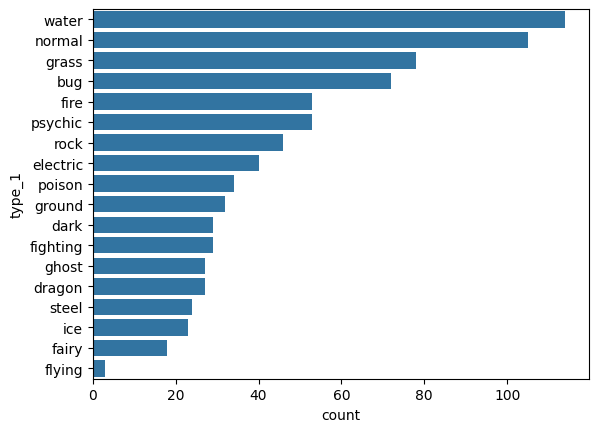

In [265]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
# sb.countplot(data=pokemon, y='type_1', color=base_color);
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);
# pokemon.describe()


### Absolute vs. Relative Frequency

Here above charts are created on Absolute frequency of occurrence - which means how much that data contributes as individual,
but sometimes we want to understand what is the Relative contribution of particular element to the whole data.

Now with seaborn's countplot function by default it will use absolute frequency, but to change it in our example of pokemon
we have to re-label the axes in terms of proportions.

##### Data Wrangling and Horizontal Bar chart


In [183]:
# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)


(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


Let's merge the type_1 and type_2 column to create a new column with label type_level

Now this step is called Data Wrangling - where we change data to suite our needs.
We will be using Pandas melt() method to convert those two column into one column OR change Dataframe from wide to long format

Syntax:
    DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

    id_vars - It is a tuple representing the column(s) to use as identifier variables.
    value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
    var_name - It is a name of the new column.
    value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.


In [186]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head(10)
# pkmn_types.tail(10)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [187]:
# finding the frequency of unique values in type column
# by default order is in descending
type_counts = pkmn_types['type'].value_counts()
type_counts


water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [188]:
# also if we want to know the unique values of type column

type_order = type_counts.index
type_order
# poke_list = [p_type for p_type in type_order]
# print(poke_list)


Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

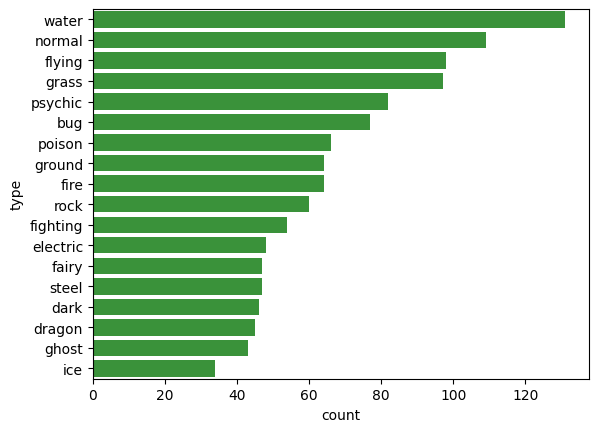

In [189]:
# now we can plot the data in horizontal bar chart
# notice that now we put type on Y axis

base_color = sb.color_palette()[2]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);


#### Charting with proportions instead of count

Now we want to put relative frequency of each data point instead of just their count


In [190]:
# get sum of all non-null values from type column
n_pokemon = pkmn_types['type'].value_counts().sum()
print(f'this is sum of total types: {n_pokemon}')

# get highest occuring value from type
# print(type_counts)
max_type_count = type_counts[0]
print(f'this is highest count in type: {max_type_count}')

# to calculate proportion we simply divide maximum count to total sum count of type
max_prop = max_type_count / n_pokemon
print(f'this is the maximum proportion: {max_prop}')


this is sum of total types: 1212
this is highest count in type: 131
this is the maximum proportion: 0.10808580858085809


In [198]:
# Create an array of evenly spaced proportioned values

# By using numpy.arange() we can get a datasets with even distributed proportions
# here range function will take start as 0, last as max_prop size and with step size of 2
tick_props = np.arange(0, max_prop, 0.01)
tick_props


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [199]:
# After we have the evenly spaced data to be charted on x-axis, now we need label it
# By using list comprehension we loop over the list of tick_props and cast them into string of 2 decimal space

# Use a list comprehension to create tick_names that we will apply to the tick labels.
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/3.9/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10']

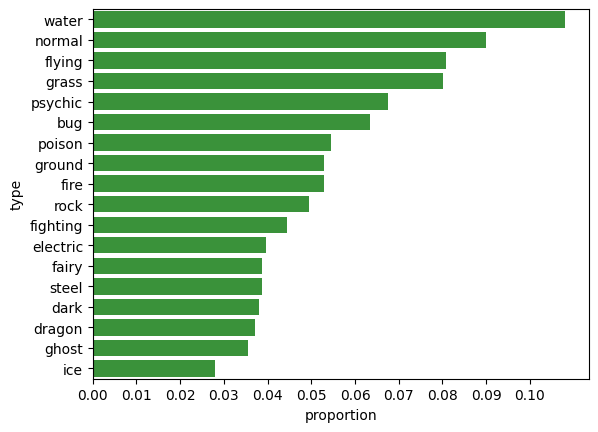

In [200]:
# Finally we are ready to plot the charts

sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');


### Counting Missing Data --------------------

As previously seen, sometimes datasets contains empty/missing/null values and we need to know count of those.
For this purpose we can use either
- pandas.DataFrame.isna() OR
- pandas.DataFrame.isnull()


In [201]:
# let's load our data - this time we are using sales data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [202]:
sales_data.shape


(8190, 12)

In [203]:
sales_data.isnull()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [204]:
sales_data.isna()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [205]:
sales_data.isna().sum()


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [206]:
# We got the count of all our missing values but what if we want to chart them
# we will prepare a table with NaN data - for that we need to drop all the columns which does not have null values

na_counts = sales_data.drop(['Store','Date', 'Temperature', 'Fuel_Price', 'IsHoliday'], axis=1).isna().sum()
# na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)


MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64


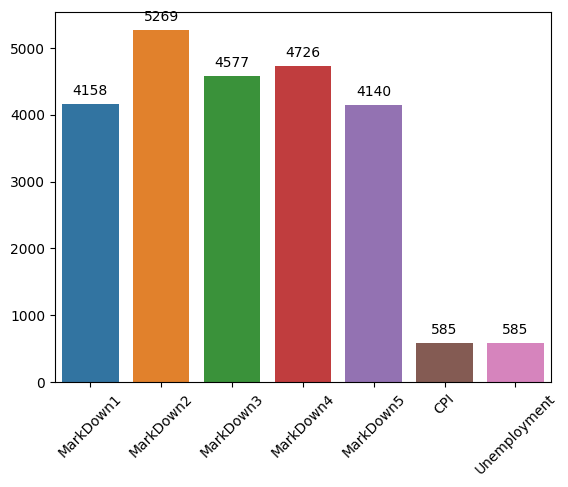

In [208]:
# Using Seaborn barplot() to plot NaN value data
# We will print values on each bar to make more insightful

# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
sb.barplot(x=na_counts.index.values, y=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=45)

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

### Pie Charts ------------------------

Pie charts are commonly used to represent relative frequencies for categorical data. Use Pie charts only when you have less number of categories

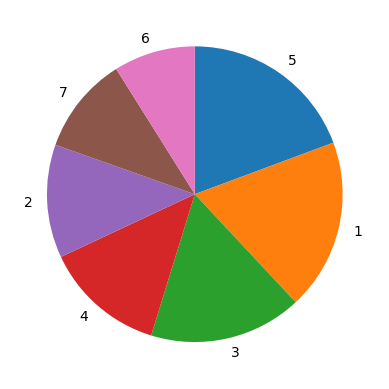

In [209]:
# matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)

# matplotlib.pyplot.axis(*args, emit=True, **kwargs)  - here optional arguments are xmin, xmax, ymin, ymax as floats

# Plot simple pie chart
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)

# plt.axis('square');
plt.axis();

#### Donut Plot

This is same as Pie but with a hole in between. to create a donut you can simply add wedgeprops argument to pie fucntion


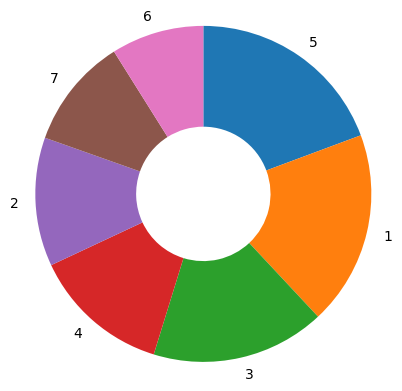

In [212]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6})
plt.axis('square');


### Histogram

This is used when you have lot of numerical data and need to chart them in a continuous fashion.


In [213]:
# Use matplotlib.pyplot.hist()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)


(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

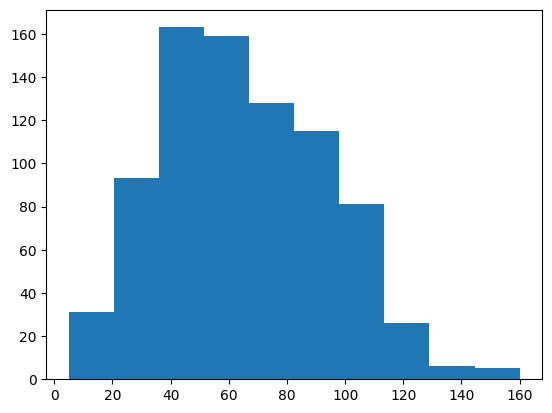

In [215]:
# We will use speed column to plot on histogram
plt.hist(data = pokemon, x = 'speed')


By default hist function divides data into 10 bins based on the range of values input.
In most of the cases we will need to change the bin setting as 10 bin is too low to understand the data.
Now remember you can use _dataframe['column'].describe()_ to get min and max limits for setting the bins.


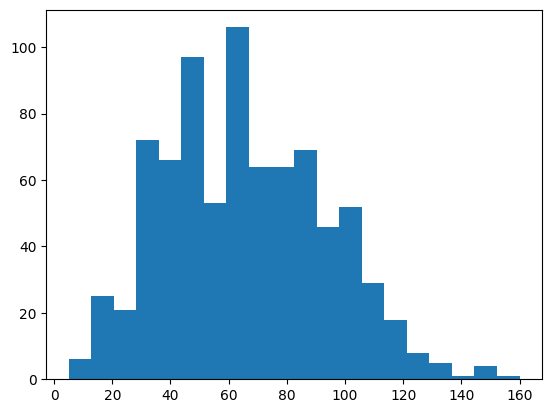

In [219]:
# Histogram with fixed bins
plt.hist(data = pokemon, x = 'speed', bins = 20);


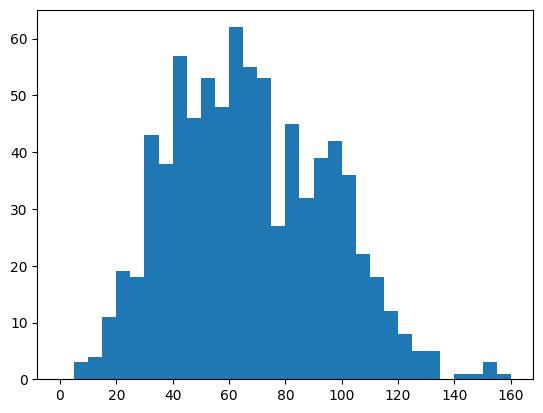

In [221]:
# Histogram with dynamic number of bins - use arange()
bins = np.arange(np.around(0), pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);


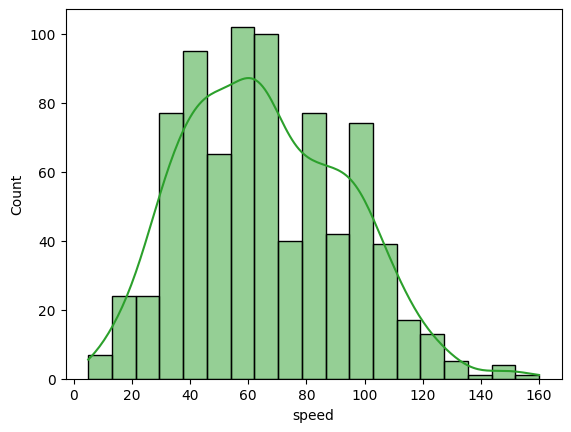

In [224]:
# Another approach is to use Seaborn histplot()

# sb.histplot(pokemon['speed']);

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.histplot(pokemon['speed'], kde=True, color=base_color);

#### Plotting two histograms side by side

pyplot.subplot() and pyplot.figure() helps use play around and put two histograms to compare


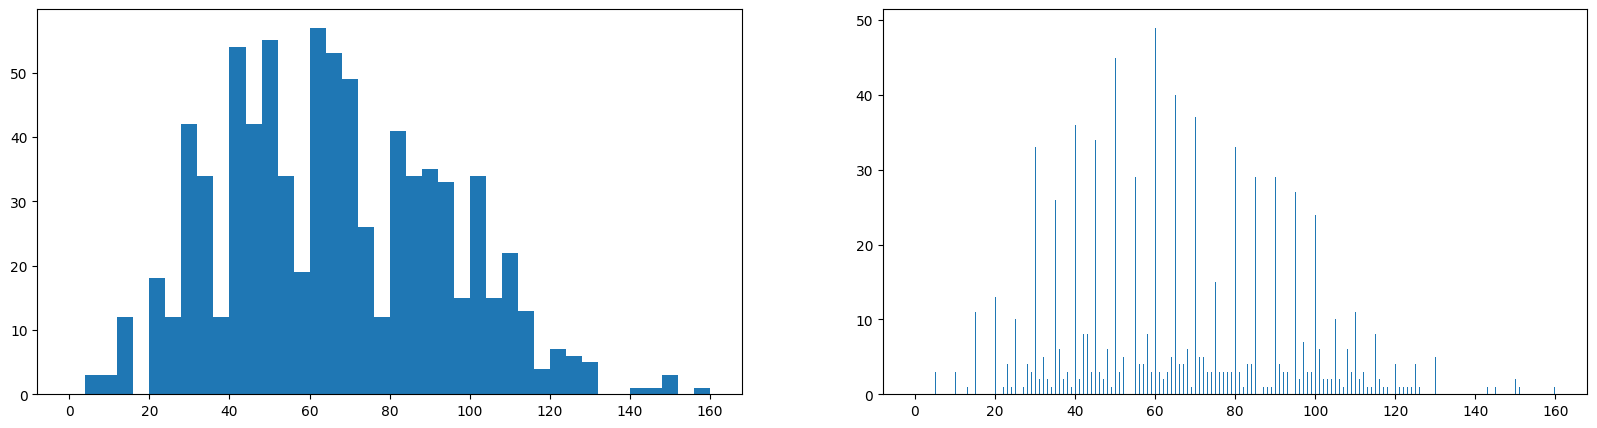

In [225]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);
# you can put spaces between bars using rwidth
# plt.hist(data = pokemon, x = 'speed', bins = bins, rwidth=0.7);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);


### Scatterplots -------------------------------
We use Scatterplots if we want to inspect the relationship between two numeric variable which are plotted on each individual axis


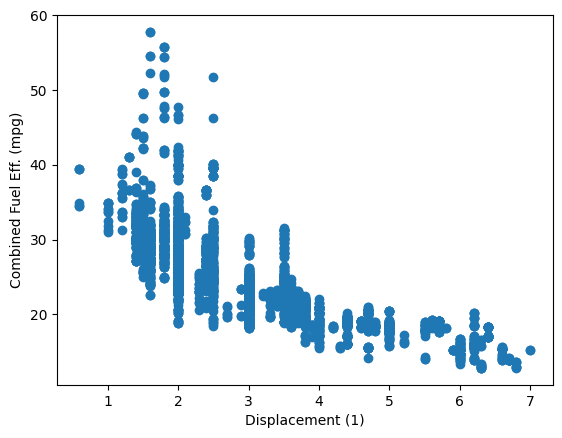

In [230]:
# matplotlib.pyplot.scatter()

fuel_econ = pd.read_csv('fuel-econ.csv')
# fuel_econ.head(10)
# fuel_econ.shape

plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

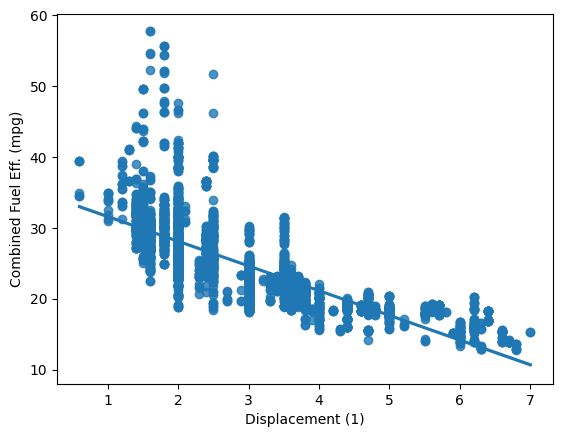

In [233]:
# seaborn.regplot()
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb')
# sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')


#### Overplotting, Transparency, and Jitter
Due to large datasets containing large numerical values when we use scatterplot they overplot or overlap thus hiding the required data points.
Therefore, we use Transparency and jitter to overcome this problem


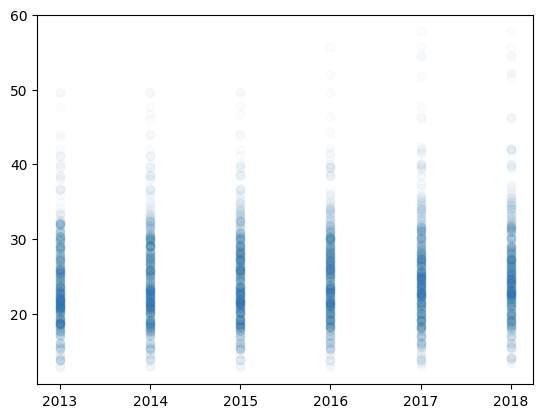

In [241]:
# The scatter_kws helps to specify the opaqueness of the data points.
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque.
# sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/50);


### Heat Maps -----------------------
These can be used in place of scatterplot, and they are similar to histogram but we do not need the height in the chart.
Heat maps can be implemented by using hist2d() function.

These are the best scenarios you can use heat maps:
- To represent a plot for discrete vs another discrete element
- Alternative to scatter-plot transparency when there are huge data points

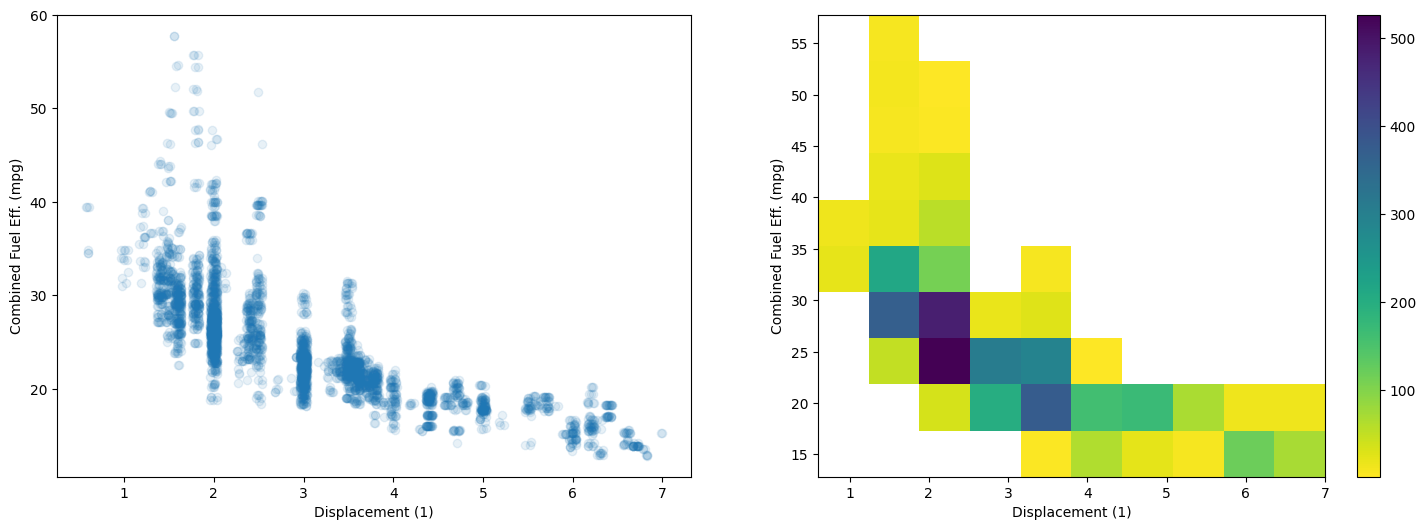

In [245]:
# Using matplotlib.pylpot.hist2d()
# comparison between scatterplot and heat map

fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
# plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
# we can also use cmin to specify what is the min value required to be plotted on map,
# other than this we can beautify it with cmap and color palette value
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');


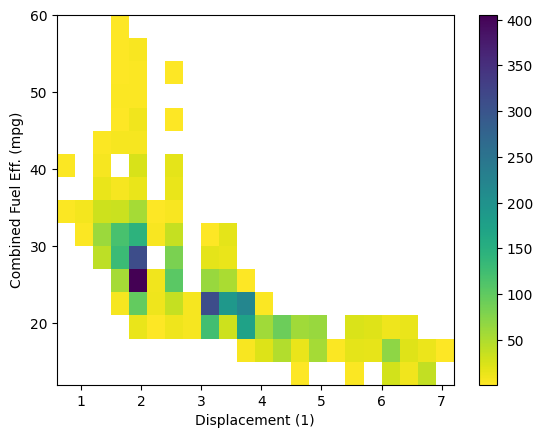

In [246]:
# Specify bin edges

bins_x = np.arange(0.6, 7+0.3, 0.3) # start, stop, step
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])  # here bins takes two edge variables
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');


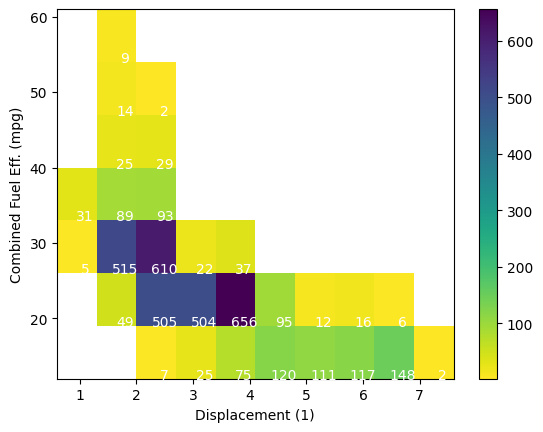

In [248]:
# text annotation on each cell using pyplot.text() function
# Specify bin edges
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Select the bi-dimensional histogram, a 2D array of samples x and y.
# Values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 0: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 100:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

# if value of annotations are large, suggestion is to leave them out and keep heat plot as basic.

### Violin Plots
When you want to represent relationship between one quantitative and one qualitative variable, we will use Violin Plots


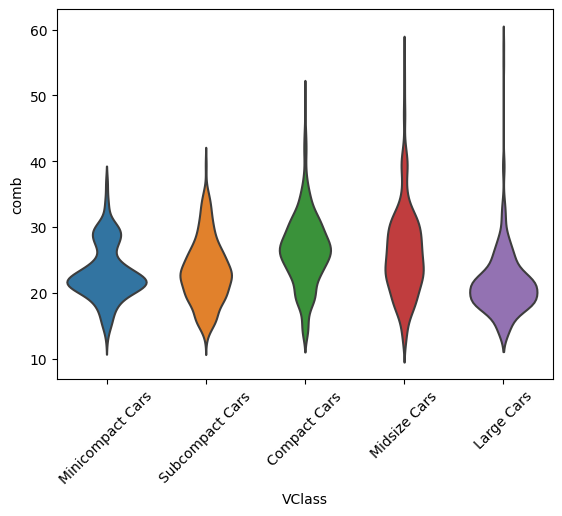

In [254]:
# For Fuel Efficiency VS. Vehicle Class

# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
# base_color =
chart = sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None);
## All the plot comes with a mini box plot inside them - that we will see in next chapter - but they can be removed using inner = None
# sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None);
# sb.set_context(sb.plotting_context(45))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

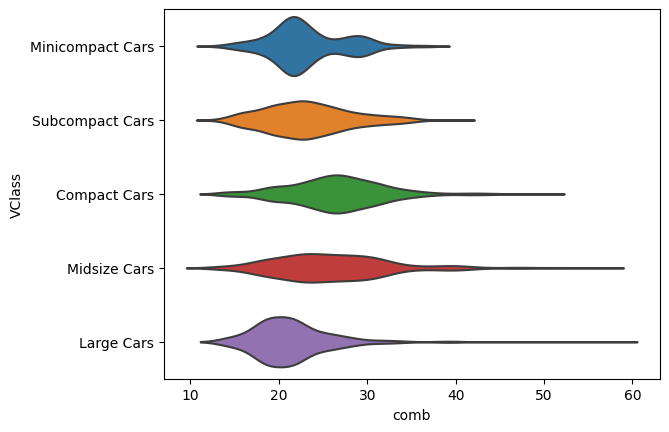

In [255]:
## Horizontal Violin plot
sb.violinplot(data=fuel_econ, y='VClass', x='comb', inner=None);
# sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

### Box plots
Another way to present numerical and categorical variables. Difference from violin plot is that box plot is more focused on summarization of data.


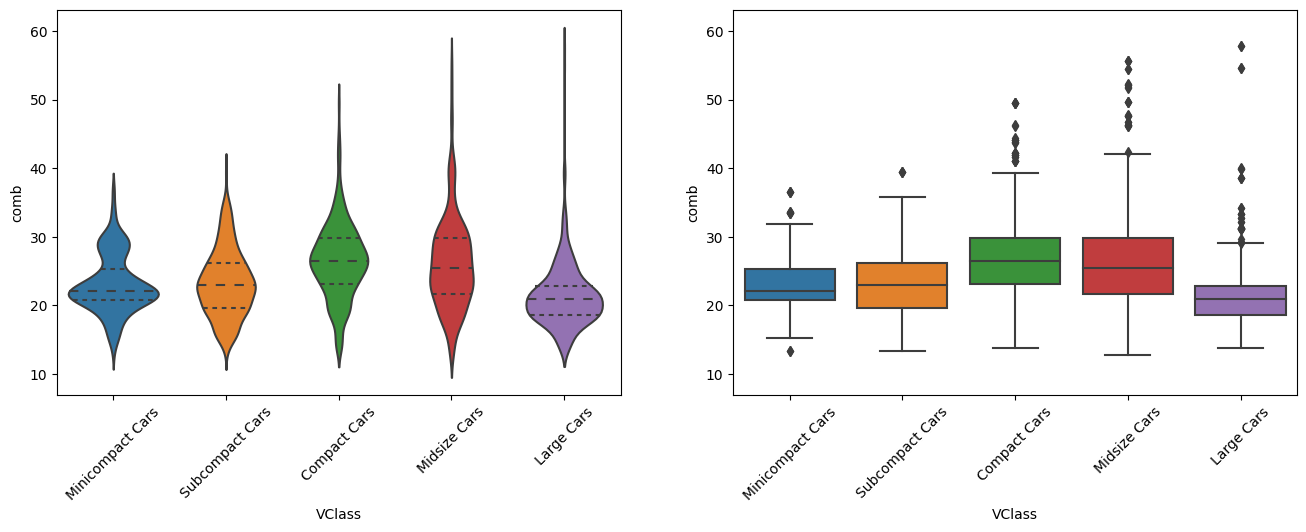

In [256]:
# Violin versus Box plot

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner='quartile')
plt.xticks(rotation=45)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb')
plt.xticks(rotation=45)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


You can notice the dotted lines in violin plot matches the solid lines on box plot, which indicates the range of distribution on more summarized fashion
Box plots are more useful when you have large quantitiy of categories or groups to be comapred.
Also notice that you can't see slight bimodality curve present in box plot but Violin plot gives you more insights for data exploration.


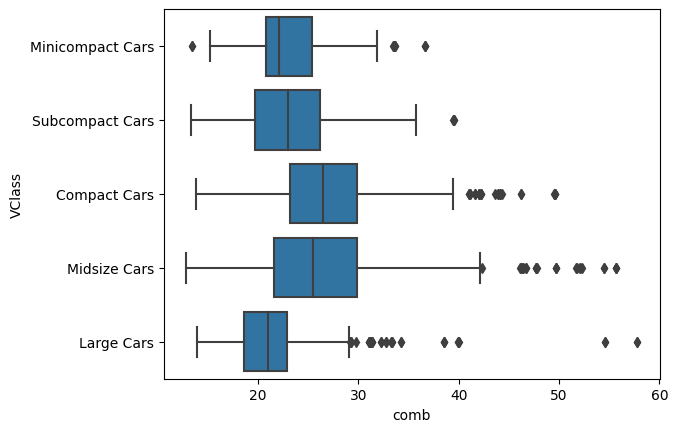

In [260]:
# Horizontal Box Plots

sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);


### Clustered Bar Charts
When we want to chart count of each group of quantitative and qualitative with combination of labels on two variables we use Clustered Bar Charts


In [261]:
# Plot a Bar chart between two qualitative variables
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ.head(10)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [263]:
# Adding a new column using transmission type - Automatic or Manual
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])  # Lambda function is an anonymous function that yields result with 1 expression
fuel_econ.head(10)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6,Manual
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,...,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4,Automatic


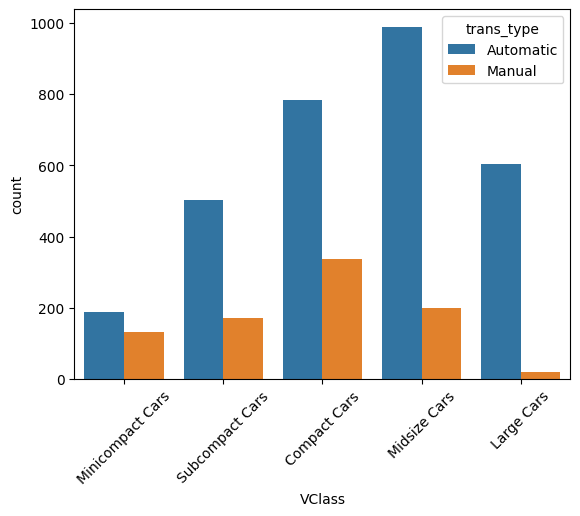

In [264]:
# Plot the bar chart
chart = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);